In [1]:
IMG_WIDTH = 1400
IMG_HEIGHT = 1400
ROW_SLICE = slice(0, 1400)
COL_SLICE = slice(1000, None)

In [2]:
import os
import sys
import numpy as np
sys.path.append("../")
from matplotlib.image import imread
import matplotlib.pyplot as plt
import tensorflow as tf
from UNet import get_unet

Using TensorFlow backend.


In [18]:
%matplotlib inline

In [3]:
data_dir = "/data/uob/"
data_folder = os.path.join(data_dir, 'train_validation_test')
#clean_dir = os.path.join(data_folder, 'clean_300')
trained_dir = os.path.join(data_dir, "trained_models")

In [4]:
def inference_step(network_model, test_data_generator, predict_steps):

    y_pred = list()

    for _ in tqdm(range(predict_steps)):
        X_batch, _ = next(test_data_generator)
        Y_batch_pred = network_model.predict_on_batch(X_batch)
        #print(Y_batch_pred.shape)
        y_pred.append(Y_batch_pred)
    y_pred = np.concatenate(y_pred, axis=0)

    return y_pred

In [5]:
CHECKPOINT_FOLDER_PATH = os.path.join(data_dir, 'trained_models')
TASK_NAME = 'UNet_retrain_new_data_clean_300'
TASK_FOLDER_PATH = os.path.join(CHECKPOINT_FOLDER_PATH, TASK_NAME)

In [5]:
def trained_model(epochs):
    TRAINING_WEIGHTS_FILEPATH=os.path.join(trained_dir, 'REPRODUCIBILITY_TEST_trained_UNet_{}epochs.hdf5'.format(epochs))
    return TRAINING_WEIGHTS_FILEPATH

In [6]:
model_250 = get_unet()
model_250.load_weights(trained_model(250))

In [8]:
def import_test_data(d):
    indices = np.load(os.path.join(TASK_FOLDER_PATH, "train_val_test_indices_{}mm.npz".format(d)))
    Xy = np.load(os.path.join(clean_dir, "Xy_{}mm_clean_300.npz".format(d)))
    test_indices = indices["test"]
    X = Xy["x"]
    y = Xy["y"]
    return X[test_indices],y[test_indices]

In [11]:
Xy_test = np.load(os.path.join(data_dir, "Jordan", "Xy_test.npz"))

In [13]:
X_test = Xy_test["x"]

In [14]:
y_test = Xy_test["y"]

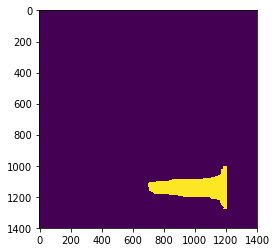

In [19]:
plt.imshow(y_test[0])

In [21]:
preds_250 = model_250.predict(X_test, batch_size=2)

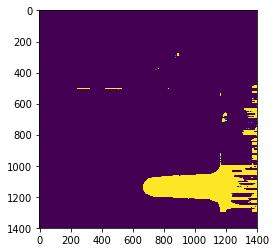

In [22]:
plt.imshow(preds[0][...,0])

In [23]:
model_500 = get_unet()
model_500.load_weights(trained_model(500))

In [24]:
preds_500 = model_500.predict(X_test, batch_size=2, verbose=1)

###### plt.imshow(preds_500[0][...,0])

In [26]:
model_1000 = get_unet()
model_1000.load_weights(trained_model(1000))

In [27]:
preds_1000 = model_1000.predict(X_test, batch_size=2, verbose=1)

396/396 [==============================] - 531s 1s/step


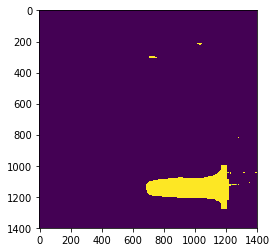

In [29]:
plt.imshow(preds_1000[0][...,0])

In [30]:
model_1500 = get_unet()
model_1500.load_weights(trained_model(1500))

In [31]:
preds_1500 = model_1500.predict(X_test, batch_size=2, verbose=1)

396/396 [==============================] - 548s 1s/step


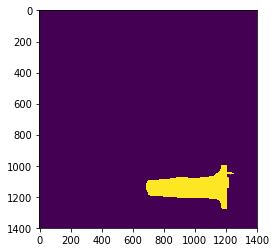

In [32]:
plt.imshow(preds_1500[0][...,0])